In [2]:
#import all the packages you need
import pandas as pd
import numpy as np
import sys
import os
import glob

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
#generate list for mock
PATH = os.getcwd()
print(PATH)
os.listdir(PATH)

G:\117\117_20190707_H3K9me3quant_repKrepL\_pipeline\v2


['.ipynb_checkpoints',
 '117_201900707_repEGI_GRAPH_gB_Hoechst_WITHticks.png',
 '117_201900707_repEGI_GRAPH_gB_NOticks.png',
 '117_201900707_repEGI_GRAPH_gB_WITHticks.png',
 '117_201900707_repEGI_GRAPH_H3K9me3_NOticks.png',
 '117_201900707_repEGI_GRAPH_H3K9me3_WITHticks.png',
 '117_201900707_repEGI_GRAPH_Hoechst_NOticks.png',
 '117_201900707_repEGI_GRAPH_Hoechst_WITHticks.png',
 '117_20190707_H3K9me3quant_repL_v2CNNexport_usingMODEL_117_20190601_H3K9me3quant_repE_v1.csv',
 '117_20190707_H3K9me3quant_repL_v2CNNexport_usingMODEL_117_20190707_H3K9me3quant_repL_v.csv',
 '117_20190707_H3K9me3quant_repL_v2Cytoplasm.csv',
 '117_20190707_H3K9me3quant_repL_v2Experiment.csv',
 '117_20190707_H3K9me3quant_repL_v2Image.csv',
 '117_20190707_H3K9me3quant_repL_v2NUC_DAPI.csv',
 '117_20190707_H3K9me3quant_repL_v2NUC_expanded.csv',
 '117_20190707_H3K9me3quant_repL_v2_IDsandCoords.csv',
 'CNNpredictions_20190710_0714',
 'CNNpredictions_20190710_1241',
 'CNNpredictions_20190710_1321',
 'fastai',
 'trainin

## Graphing linescans for 3 independednt biological replicates
FIRST: Load the data for each of the biologial replicates separately

df_MOCK_profile_ALLreps = pd.read_csv("concat_df_MOCK.csv", na_values=0, index_col=None, header=0)

In [32]:
#If linescanes for replicates weren't collected simultaneously:
biorep1_csv_MOCK = r"G:/117/117_20190601_H3K9me3quant_repE/_pipeline/v1/117_20190601_H3K9me3_v1_repE_MOCK.csv"#repE MOCK
biorep2_csv_MOCK = r"G:/117/117_20190704_H3K9me3quant_repI/_pipeline/v1/CNNpredictions_20190707_1709/117_20190704_H3K9me3quant_repI_v1_MOCK_LINESCANS_repI_only.csv" #repI MOCK
biorep3_csv_MOCK = r"G:/117/117_20190707_H3K9me3quant_repKrepL/_pipeline/v2/CNNpredictions_20190710_1321/117_20190707_H3K9me3quant_repL_v2_MOCK_LINESCANS_repL_only.csv"

#load profiles for each of the MOCK datasets
df_MOCK_profile_biorep1 = pd.read_csv(biorep1_csv_MOCK, na_values=0, index_col=None, header=0)
df_MOCK_profile_biorep2 = pd.read_csv(biorep2_csv_MOCK, na_values=0, index_col=None, header=0)
df_MOCK_profile_biorep3 = pd.read_csv(biorep3_csv_MOCK, na_values=0, index_col=None, header=0)
MOCK_df_li = [df_MOCK_profile_biorep1,df_MOCK_profile_biorep2, df_MOCK_profile_biorep3]
df_MOCK_profile_ALLreps = pd.concat(MOCK_df_li, axis=1)

In [33]:
#If linescanes for replicates weren't collected simultaneously:
biorep1_csv_TB = r"G:/117/117_20190601_H3K9me3quant_repE/_pipeline/v1/117_20190601_H3K9me3_v1_repE_TB.csv" #repE TB
biorep2_csv_TB = r"G:/117/117_20190704_H3K9me3quant_repI/_pipeline/v1/CNNpredictions_20190707_1709/117_20190704_H3K9me3quant_repI_v1_RawLinescans_TB_repI_only.csv" #repI TB
biorep3_csv_TB = r"G:/117/117_20190707_H3K9me3quant_repKrepL/_pipeline/v2/CNNpredictions_20190710_1321/117_20190707_H3K9me3quant_repL_v2_RawLinescans_TB_repL_only.csv"
#load profiles for each of the MOCK datasets
df_TB_profile_biorep1 = pd.read_csv(biorep1_csv_TB, na_values=0, index_col=None, header=0)
print(df_TB_profile_biorep1.shape[1]/3)
df_TB_profile_biorep2 = pd.read_csv(biorep2_csv_TB, na_values=0, index_col=None, header=0)
print(df_TB_profile_biorep2.shape[1]/3)
df_TB_profile_biorep3 = pd.read_csv(biorep3_csv_TB, na_values=0, index_col=None, header=0)
print(df_TB_profile_biorep3.shape[1]/3)

TB_df_li = [df_TB_profile_biorep1,df_TB_profile_biorep2, df_TB_profile_biorep3]

df_TB_profile_ALLreps = pd.concat(TB_df_li, axis=1)
print(df_TB_profile_ALLreps.shape[1]/3)

1943.0
2096.0
750.0
4789.0


In [34]:
#check the data looks good
def check_data_shape(df_ALLreps):
    C1_n  = df_ALLreps.filter(regex='_C1').shape[1] 
    C2_n  = df_ALLreps.filter(regex='_C2').shape[1] 
    C3_n  = df_ALLreps.filter(regex='_C3').shape[1] 
    #C4_n  = df_ALLreps.filter(regex='_C4').shape[1] 
    shape = df_ALLreps.shape[1] / 3 #4
    print(f'shape:{int(shape)}| C1:{C1_n}| C2:{C2_n}| C3:{C3_n}') #'| C4:{C4_n}')

In [35]:
check_data_shape(df_MOCK_profile_ALLreps)

shape:8283| C1:8283| C2:8283| C3:8283


In [36]:
check_data_shape(df_TB_profile_ALLreps)

shape:4789| C1:4789| C2:4789| C3:4789


In [37]:
df_TB_profile_ALLreps.shape[1]/ 3#4

4789.0

In [38]:
exp_var = "117_201900707_repEGI"
#name your channels
channel_dict = {
    "C1":"gB",
    "C2":"Hoechst",
    "C3":"H3K9me3"}
    #"C4":"AcMT"}
channel_num = len(channel_dict)

In [39]:
df_TB_profile_ALLreps.shape

(2001, 14367)

In [40]:
#merge MOCK and TB datasets
def merge_MOCK_TB(df_MOCK, df_TB):
    print(df_MOCK.shape[1]/3) #4)
    print(df_TB.shape[1]/3) #4)
    
    df_FINAL = pd.concat([df_MOCK, df_TB], axis=1)


    print(df_FINAL.shape[1]/4)
    return df_FINAL

In [41]:
#df_FINAL = merge_MOCK_TB(df_MOCK_profile_ALLreps, df_TB_profile_ALLreps)
df_FINAL = merge_MOCK_TB(df_MOCK_profile_ALLreps, df_TB_profile_ALLreps)



8283.0
4789.0
9804.0


In [42]:
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[6]
df_T.shape[0]/3 #4

13072.0

In [43]:
#clean up any errors
df_T.loc[df_T.timepoint=="96", "timepoint"] = "96hpi"

In [44]:
df_T.groupby(["timepoint","biorep"])[["channel"]].count()/3 #4

channel
timepoint biorep         
96hpi     repE     1943.0
          repI     2096.0
          repL      750.0
MOCK      repE     5325.0
          repI     1833.0
          repL     1125.0

In [45]:
df_T.shape[0]/3

13072.0

In [46]:
df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_bio_mean, df_upper, df_lower, df_T = getMEAN_SEM_UPPER_LOWER(df_FINAL)
df_T.reset_index(inplace=True)
df_T.index.values

In [47]:
df_T.set_index(["biorep", "timepoint","channel"], inplace=True)

In [48]:
df_T.groupby(["biorep","channel", "timepoint"]).mean()

0            1            2            3     \
biorep channel timepoint                                                       
repE   C1      96hpi      1826.874841  1828.608300  1829.119128  1829.619406   
               MOCK        855.799958   855.776452   855.229940   855.284939   
       C2      96hpi      4506.849004  4511.007473  4510.726466  4511.209302   
               MOCK       3460.171126  3459.480726  3456.957860  3456.281750   
       C3      96hpi      1773.102206  1772.703605  1770.893835  1769.686372   
               MOCK       1075.141413  1075.119211  1074.538704  1074.616423   
repI   C1      96hpi      1431.477804  1432.406917  1432.251163  1432.149790   
               MOCK       1050.140105  1051.063700  1050.647761  1049.061919   
       C2      96hpi      2820.919254  2821.888233  2819.012380  2817.089790   
               MOCK       3410.375115  3410.644498  3406.158213  3397.564715   
       C3      96hpi      1433.957181  1436.036763  1436.721125  1437.362330   
               MOCK        889.589846   890.425487   890.365244   888.788607   
repL   C1      96hpi      1592.106017  1595.997515  1595.044861  1598.404471   
               MOCK       1190.153615  1189.061096  1190.118239  1191.060912   
       C2      96hpi      3625.976444  3631.925159  3629.750560  3636.405485   
               MOCK       3570.431229  3562.439368  3561.025904  3558.173762   
       C3      96hpi      1721.040687  1723.698235  1721.063291  1721.834979   
               MOCK       1073.276627  1071.343650  1071.963518  1072.406901   

                                 4            5            6            7     \
biorep channel timepoint                                                       
repE   C1      96hpi      1829.506382  1831.203464  1829.078979  1830.575757   
               MOCK        855.006764   855.498120   855.494679   855.323498   
       C2      96hpi      4511.939872  4517.583186  4515.105448  4521.525825   
               MOCK       3454.191947  3454.886697  3453.750833  3451.119679   
       C3      96hpi      1768.914859  1770.543904  1769.276594  1772.298403   
               MOCK       1074.116882  1074.512388  1074.613198  1074.277411   
repI   C1      96hpi      1433.295210  1435.060055  1431.035421  1432.387944   
               MOCK       1048.791218  1049.984061  1051.129466  1052.253197   
       C2      96hpi      2817.701518  2818.975745  2810.305243  2812.418764   
               MOCK       3393.366352  3394.450508  3394.954564  3394.993946   
       C3      96hpi      1439.025359  1440.000794  1435.536212  1436.379101   
               MOCK        888.756373   889.451244   889.820157   889.810388   
repL   C1      96hpi      1597.862918  1600.975536  1600.107741  1602.994465   
               MOCK       1190.535757  1187.446161  1186.999601  1187.745227   
       C2      96hpi      3635.560686  3644.776551  3644.934130  3656.498841   
               MOCK       3551.311220  3537.992999  3532.531529  3530.764115   
       C3      96hpi      1718.360531  1721.006527  1719.898654  1723.408117   
               MOCK       1071.326674  1067.865026  1066.182538  1065.135914   

                                 8            9     ...         1991  \
biorep channel timepoint                            ...                
repE   C1      96hpi      1828.437893  1828.385099  ...  1924.987573   
               MOCK        855.612429   854.990732  ...          NaN   
       C2      96hpi      4520.108491  4523.145848  ...  4931.344562   
               MOCK       3450.079325  3445.988482  ...          NaN   
       C3      96hpi      1772.620864  1774.743788  ...  2000.591613   
               MOCK       1074.432016  1073.269038  ...          NaN   
repI   C1      96hpi      1433.417516  1433.092085  ...  1441.540378   
               MOCK       1052.105895  1052.799823  ...          NaN   
       C2      96hpi      2814.199854  2813.234011  ...  2876.369436   
               MOCK       3391.179891  

In [49]:
df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

In [50]:
df_T.index.values

array([('repE', 'MOCK', 'C1'), ('repE', 'MOCK', 'C2'),
       ('repE', 'MOCK', 'C3'), ..., ('repL', '96hpi', 'C1'),
       ('repL', '96hpi', 'C2'), ('repL', '96hpi', 'C3')], dtype=object)

In [51]:
def multi_chan_shifted(df_bio_mean,df_upper,df_lower,shift_val):
    MOCK_x_values = np.linspace(shift_val, (shift_val+2001), 2001)
    for channel_ID, channel_name in channel_dict.items():
        f = plt.figure()   
        ax = f.add_subplot(111)
        
        increment = 1
        ticks_at = 5
        start_val = 12
        shift_axis = 62
        end_Val = start_val + shift_axis + 20
        
        
        ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
        ax.xaxis.set_ticks(np.arange(((400/26)*increment)*start_val, ((400/26)*increment)*end_Val, (400/26)*ticks_at))
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x*65)/1000,1)-shift_axis) ))
        ax.set_xlim(675,1300)

        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
 
        #plot MOCK
        ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
        ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

        #plot TB
        ax.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
        ax.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label="TB40/E", alpha=0.5, color="orchid")
        
        midpoint = 954
        span = (400/26)*10

        ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
        ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')

        
        ax.yaxis.tick_right()
        leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
        leg._legend_box.align = "left"  
        plt.savefig(f'{exp_var}_GRAPH_{channel_name}_NOticks.png', dpi=600)
        plt.show()
        
        f = plt.figure()   
        ax = f.add_subplot(111)
        
        increment = 1
        ticks_at = 5
        start_val = 12
        shift_axis = 62
        end_Val = start_val + shift_axis + 20
        
        
        ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
        ax.xaxis.set_ticks(np.arange(((400/26)*increment)*start_val, ((400/26)*increment)*end_Val, (400/26)*ticks_at))
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x*65)/1000,1)-shift_axis) ))
        ax.set_xlim(675,1300)
 
        #plot MOCK
        ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
        ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

        #plot TB
        ax.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
        ax.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label="TB40/E", alpha=0.5, color="orchid")
        
        midpoint = 954
        span = (400/26)*10

        ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
        ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
        
        ax.yaxis.tick_right()
        leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
        leg._legend_box.align = "left"  
        plt.savefig(f'{exp_var}_GRAPH_{channel_name}_WITHticks.png', dpi=600)
        plt.show()
        
#plot gB and Hoechst in the same graph:
    import matplotlib as mpl
    mpl.rcParams['hatch.linewidth'] = 4 
    f = plt.figure()   
    ax = f.add_subplot(111)

    increment = 1
    ticks_at = 5
    start_val = 12
    shift_axis = 62
    end_Val = start_val + shift_axis + 20
    

    ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
    ax.xaxis.set_ticks(np.arange(((400/26)*increment)*start_val, ((400/26)*increment)*end_Val, (400/26)*ticks_at))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x*65)/1000,1)-shift_axis) ))
    ax.set_xlim(675,1300)

    ax2 = ax.twinx()
    
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    ax2.spines["right"].set_position(("axes", 0.85))
    make_patch_spines_invisible(ax2)
    ax2.spines["right"].set_visible(True)
    
    
    midpoint = 954
    span = (400/26)*10

    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')


    
    channel_ID = "C1"
    #plot MOCK gb
    ax2.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax2.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="orange")

    #plot TB gb
    ax2.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
    ax2.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label="TB40/E", alpha=0.5,facecolor="orange", hatch="//",edgecolor="white")

    channel_ID = "C2"

    #plot MOCK HOECHST
    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="royalblue")

    #plot TB HOECHST
    ax.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label="TB40/E", alpha=0.5, facecolor="royalblue",hatch="\\\\",edgecolor="white")


    #ax.yaxis.tick_right()
    ax.yaxis.tick_right()
    ax.yaxis.label.set_color("blue")
    ax.tick_params(axis='y', colors="blue")
    ax2.yaxis.label.set_color("darkorange")
    ax2.tick_params(axis='y', colors="darkorange")
    ax2.spines["right"].set_color('darkorange')

    #leg = plt.legend(loc=2,frameon=False, fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    
    
    ax.set_ylim(0,14900)
  
    legA = ax.legend(loc="upper left", bbox_to_anchor=(0, 0.7), title_fontsize=14, title="Hoechst", ncol=1,frameon=False,fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    legA._legend_box.align = "left"  
    legB = ax2.legend(loc="upper left", ncol=1,frameon=False,  title="gB", title_fontsize=14,  fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    legB._legend_box.align = "left"  
    ax.yaxis.tick_right()
    plt.savefig(f'{exp_var}_GRAPH_gB_Hoechst_WITHticks.png', dpi=600, bbox_inches = "tight")
    plt.show()
        

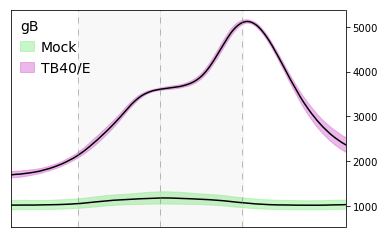

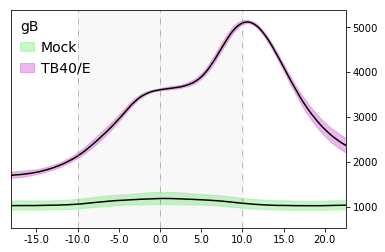

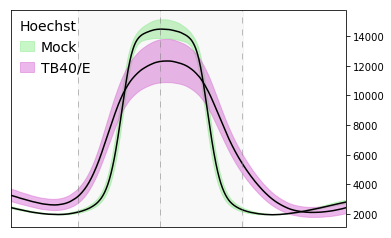

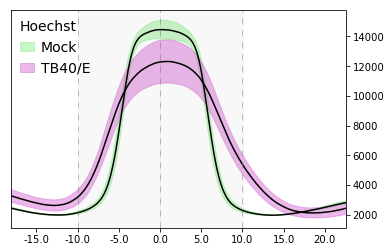

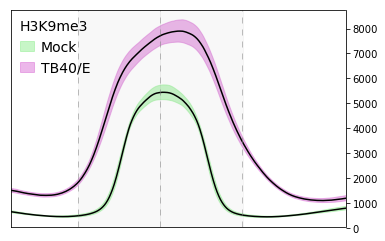

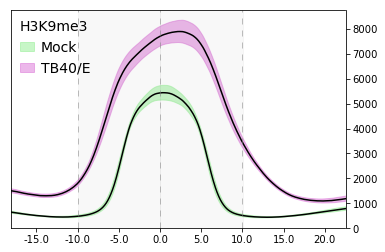

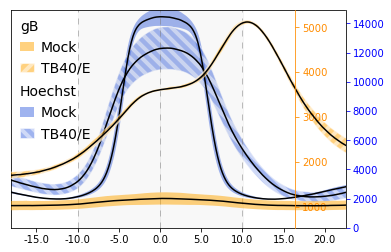

In [52]:
multi_chan_shifted(df_bio_mean,df_upper,df_lower,465)

In [53]:
def multi_chan_shifted(df_bio_mean,df_upper,df_lower,shift_val):
    MOCK_x_values = np.linspace(shift_val, (shift_val+2001), 2001)
    for channel_ID, channel_name in channel_dict.items():
        f = plt.figure()   
        ax = f.add_subplot(111)
        
        increment = 1
        ticks_at = 5
        start_val = 12
        shift_axis = 62
        end_Val = start_val + shift_axis + 20
        
        
        ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
        ax.xaxis.set_ticks(np.arange(((400/26)*increment)*start_val, ((400/26)*increment)*end_Val, (400/26)*ticks_at))
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x*65)/1000,1)-shift_axis) ))
        ax.set_xlim(675,1300)

        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off

        midpoint = 954
        span = (400/26)*10

        ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
        ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
        
        #plot MOCK
        ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
        ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label=f"{channel_name}-MOCK", alpha=0.5,color="lightgreen")

        #plot TB
        ax.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
        ax.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label=f"{channel_name}-TB40/E", alpha=0.5, color="orchid")
        

        
        ax.yaxis.tick_right()
        plt.legend(loc=2,frameon=False)
        plt.savefig(f'{exp_var}_GRAPH_{channel_name}_NOticks.png', dpi=600, bbox_inches = "tight")
        plt.show()
        
        f = plt.figure()   
        ax = f.add_subplot(111)
        
        increment = 1
        ticks_at = 5
        start_val = 12
        shift_axis = 62
        end_Val = start_val + shift_axis + 20
        
        
        ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
        ax.xaxis.set_ticks(np.arange(((400/26)*increment)*start_val, ((400/26)*increment)*end_Val, (400/26)*ticks_at))
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x*65)/1000,1)-shift_axis) ))
        ax.set_xlim(675,1300)
        
        
        ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
        ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
        ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
 
        #plot MOCK
        ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
        ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label=f"{channel_name}-MOCK", alpha=0.5, color="lightgreen")

        #plot TB
        ax.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
        N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
        ax.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label=f"{channel_name}-TB40/E", alpha=0.5, color="orchid")
        

        
        ax.yaxis.tick_right()
        plt.legend(loc=2,frameon=False)
        plt.savefig(f'{exp_var}_GRAPH_{channel_name}_WITHticks.png', dpi=600, bbox_inches = "tight")
        plt.show()
        
    #plot gB and Hoechst in the same graph:
    import matplotlib as mpl
    mpl.rcParams['hatch.linewidth'] = 4 
    f = plt.figure()   
    ax = f.add_subplot(111)

    increment = 1
    ticks_at = 5
    start_val = 12
    shift_axis = 62
    end_Val = start_val + shift_axis + 20
    

    ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
    ax.xaxis.set_ticks(np.arange(((400/26)*increment)*start_val, ((400/26)*increment)*end_Val, (400/26)*ticks_at))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x*65)/1000,1)-shift_axis) ))
    ax.set_xlim(675,1300)

    ax2 = ax.twinx()
    
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    ax2.spines["right"].set_position(("axes", 0.875))
    make_patch_spines_invisible(ax2)
    ax2.spines["right"].set_visible(True)
    
    midpoint = 954
    span = (400/26)*10

    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    
    channel_ID = "C1"
    #plot MOCK gb
    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="gB-MOCK", alpha=0.5,facecolor="orange")

    #plot TB gb
    ax.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label="gB-TB40/E", alpha=0.5,facecolor="orange", hatch="//",edgecolor="white")

    channel_ID = "C2"

    #plot MOCK HOECHST
    ax2.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax2.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Hoechst-MOCK", alpha=0.5,facecolor="royalblue")

    #plot TB HOECHST
    ax2.plot(df_bio_mean.loc[(channel_ID,"96hpi")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"96hpi")].index)
    ax2.fill_between(N,df_upper.loc[(channel_ID,"96hpi")],df_lower.loc[(channel_ID,"96hpi")],label="Hoechst-TB40/E", alpha=0.5, facecolor="royalblue",hatch="\\\\",edgecolor="white")

    #ax.yaxis.tick_right()
    ax.yaxis.tick_right()
    ax2.yaxis.label.set_color("blue")
    ax2.tick_params(axis='y', colors="blue")
    ax.yaxis.label.set_color("darkorange")
    ax.tick_params(axis='y', colors="darkorange")

    ax.legend(bbox_to_anchor=(0.29, 0.85), ncol=1,frameon=False)
    ax2.legend(loc="upper left", ncol=1,frameon=False)

    ax.yaxis.tick_right()
    plt.savefig(f'{exp_var}_GRAPH_gB_Hoechst_WITHticks.png', dpi=600, bbox_inches = "tight")
    plt.show()
        
        
        

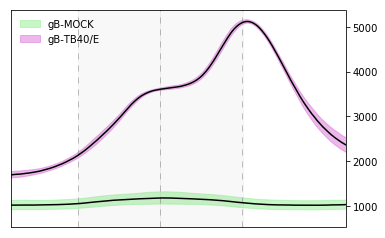

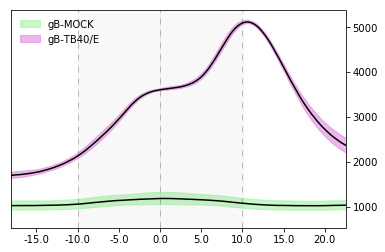

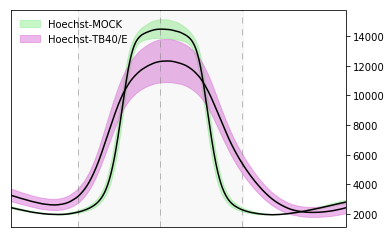

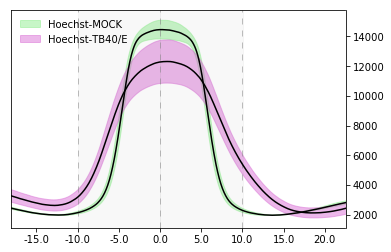

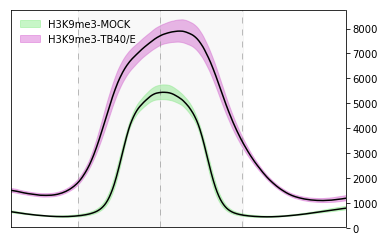

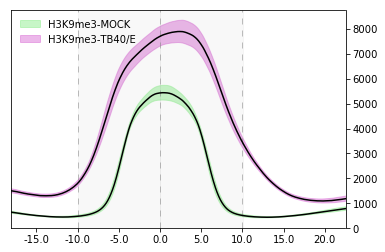

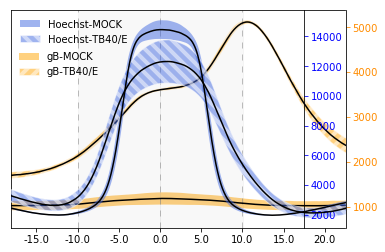

In [54]:
multi_chan_shifted(df_bio_mean,df_upper,df_lower,465)

In [55]:
df_T.reset_index().groupby(["timepoint","biorep"])[["channel"]].count()/3

channel
timepoint biorep         
96hpi     repE     1943.0
          repI     2096.0
          repL      750.0
MOCK      repE     5325.0
          repI     1833.0
          repL     1125.0

In [28]:
### Now let's try this by filtering towards the well polarized ones
df_TB_T = df_TB_profile_ALLreps.filter(like="_C3", axis=1).T
midpoint = 954
df_TB_T["next_to_AC"] = df_TB_T.iloc[:,midpoint:(midpoint + 150)].mean(axis=1)
df_TB_T["away_from_AC"] = df_TB_T.iloc[:,(midpoint-150):midpoint].mean(axis=1)
df_TB_T["degree_of_polarization"] = df_TB_T["next_to_AC"]/df_TB_T["away_from_AC"]

mean_polarization = df_TB_T["degree_of_polarization"].mean(axis=0)
var = 1.3
df_TB_T_polarized = df_TB_T[df_TB_T["degree_of_polarization"]>(mean_polarization*var)]
df_TB_T_NOTpolarized = df_TB_T[df_TB_T["degree_of_polarization"]<(mean_polarization*var)]
print(df_TB_T.shape)
print(df_TB_T_polarized.shape)
print(df_TB_T_NOTpolarized.shape)
df_TB_polarized = df_TB_T_polarized.T[:-3]
df_TB_NOTpolarized = df_TB_T_NOTpolarized.T[:-3]

(4789, 2004)
(346, 2004)
(4443, 2004)


In [29]:
polarized_li = []
for cols in df_TB_polarized.columns:
    ID = cols[:-3]
    polarized_li.append(ID)
    #polarized_li.append(ID + "_C2")
    #polarized_li.append(ID + "_C3")
#print(polarized_li)

In [30]:
df_ID_coords = pd.read_csv("G:/117/117_20190704_H3K9me3quant_repI/_pipeline/v1/117_20190704_H3K9me3quant_repI_v1_IDsandCoords.csv")

In [31]:
df_ID_coords[df_ID_coords['Unique_ID'].isin(polarized_li)].to_csv("H3K9me3_filtered_polarized.csv",index=False)


// to not display the pictures as they are goining, use this
setBatchMode(true);

// ask for a file to be imported
	
	fileName = File.openDialog("Select the file to import");
	allText = File.openAsString(fileName);
	tmp = split(fileName,".");
	// get file format {txt, csv}
	posix = tmp[lengthOf(tmp)-1];
	// parse text by lines
	text = split(allText, "\n");

//define your path, this is where files will be saved
	
	dir = getDirectory("Select a location to save the files"); 
	
//clear results in case there is something you don't want in your output Results file

	run("Clear Results")


// define array for points and image URLS
	
	var x1points = newArray;
	var y1points = newArray;
	var x2points = newArray;
	var y2points = newArray;
	
	var nuc_Ori = newArray;
	var Xmidpoints= newArray;	
	var Ymidpoints = newArray;			
	
	var C1url = newArray;
	var C2url = newArray;
	var C3url = newArray;
	//var C4url = newArray;
	
	var ImageID = newArray; 

//label you columns by number here (starting at 0, not 1)
	
	hdr = split(text[0]);

	iImageObjectID = 0;
	
	iXmid = 1;
	iYmid = 2;

	iC1url = 3;
	iC2url = 4;
	iC3url = 5;
	//iC4url = 5;
				
// loading and parsing each line
	for (i = 2; i < (text.length); i++)
	{
	   //we split each line in the csv at commas 
	   line = split(text[i],",");
	   setOption("ExpandableArrays", true);   

	   //this loads the data from the csv into the arrays me setup before so that we can iterate over each line (i)
	   //these are specifically for the HCMV ac and nucleus, but you can change them if you need.

	   Xmidpoints[i-1] = parseInt(line[iXmid]);
	   Ymidpoints[i-1] = parseInt(line[iYmid]);
	   
	   C1url[i-1] = line[iC1url]; //note we do not use parseInt here because we want the URL as a string
	   C2url[i-1] = line[iC2url];
	   C3url[i-1] = line[iC3url];
	   //C4url[i-1] = line[iC4url];
	   
	   ImageID[i-1] = line[iImageObjectID]; 

	   //now that the data is loaded from the csv, we can perform our operations
	   //open each image using the URL, draw a line with 150 width, perform a linescan and save the data to a column in the results tab 


	   open(C1url[i-1]);
	   rename("C1");
	   
	   open(C2url[i-1]);
	   rename("C2");
	   
	   open(C3url[i-1]);
	   rename("C3");
	   
	   run("Merge Channels...", "c1=C1 c2=C3 c3=C2 create");
	   run("Canvas Size...", "width=3248 height=3248 position=Center zero"); //expand canvas to 2048 + 600*2 for ROI on each side
	   makeRectangle(Xmidpoints[i-1]+300,Ymidpoints[i-1]+300,600,600); //note here we compensated for canvas size expansion
	   run("Duplicate...", "duplicate");	   			   
	   saveAs("Tiff", dir + ImageID[i-1]+"_composite.tiff");
	   close("*");
	   
	   //open(C4url[i-1]);
	   //run("Canvas Size...", "width=3548 height=3548 position=Center zero"); //expand canvas to 2048 + 750*2 for ROI on each side
	   //makeRectangle(Xmidpoints[i-1]+375,Ymidpoints[i-1]+375,750,750); //note here we compensated for canvas size expansion
	   //run("Duplicate...", "duplicate");	   			   
	   //rename("C4");
	   //save(dir+ImageID[i-1]+"_C4");
	   //close("*");
	   	   
	   
	   //merge all of these channles, cut out a 750x750 region and rotate to align every image on the axis of the linescan
	   //run("Merge Channels...", "c1=C1 c2=C2 c3=C3 c4=C4 create");
	   //makeRectangle(Xmidpoints[i-1]-375,Ymidpoints[i-1]-375,750,750);
	   //Roi.setStrokeWidth(2);
	   //setForegroundColor(255, 255, 255);
	   //run("Draw");
	   
	   
	   //run("Canvas Size...", "width=350 height=350 position=Center zero"); //expand canvas to 2048 + 750*2 for ROI on each side
	   //makeRectangle(Xmidpoints[i-1],Ymidpoints[i-1],50,50); //note here we compensated for canvas size expansion
	   //run("Duplicate...", "duplicate");
	   //save(dir+ImageID[i-1]);
	   //close("*");	
	
	}

In [58]:
#if you want some mock then do this:
df_ID_coords[df_ID_coords["Unique_ID"].str.contains('MOCK')].sample(n=200).to_csv("MOCKsample.csv",index=False)

In [ ]:
#EMERIN REP A 3 bioreps has a good way of exporting MOCK

In [140]:
### Now let's try this by filtering towards the well polarized ones
df_TB_T = df_TB_profile_ALLreps.filter(like="_C3", axis=1).T
#df_TB_T = concat_df_TB.T
df_TB_T["next_to_AC"] = df_TB_T.iloc[:,1050:1200].max(axis=1)
df_TB_T["away_from_AC"] = df_TB_T.iloc[:,800:950].max(axis=1)
df_TB_T["degree_of_polarization"] = df_TB_T["next_to_AC"]/df_TB_T["away_from_AC"]

mean_polarization = df_TB_T["degree_of_polarization"].mean(axis=0)
var = 1.25
df_TB_T_polarized = df_TB_T[df_TB_T["degree_of_polarization"]>(mean_polarization*var)]
df_TB_T_NOTpolarized = df_TB_T[df_TB_T["degree_of_polarization"]<(mean_polarization*var)]
print(df_TB_T.shape)
print(df_TB_T_polarized.shape)
print(df_TB_T_NOTpolarized.shape)
df_TB_polarized = df_TB_T_polarized.T[:-3]
df_TB_NOTpolarized = df_TB_T_NOTpolarized.T[:-3]

(3961, 2004)
(533, 2004)
(3428, 2004)


In [141]:
polarized_li = []
for cols in df_TB_polarized.columns:
    ID = cols[:-3]
    polarized_li.append(ID + "_C1")
    polarized_li.append(ID + "_C2")
    polarized_li.append(ID + "_C3")
    polarized_li.append(ID + "_C4")
#print(polarized_li)

In [112]:
df_linescan_TB_filterd = df_TB_profile_ALLreps.loc[:, df_TB_profile_ALLreps.columns.str.contains('|'.join(polarized_li))]
print(df_TB_profile_ALLreps.shape)
print(df_linescan_TB_filterd.shape)

(2001, 15844)
(2001, 2132)


In [ ]:
#### TO FILTER, GO UP TO THE TOP AND CHANGE TO THE CONCAT FUNCTION THAT HAS df_linescan_TB_filtered and run through again